# Real Estate Price Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Data Cleaning

In [2]:
df1 = pd.read_csv('C:/Users/ishan/Documents/Data Science Projects/Data Science/Machine Learning/Real_estate_Project/Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.availability.value_counts().shape, df1.society.value_counts().shape, df1.location.value_counts().shape

((81,), (2688,), (1305,))

In [4]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### I am dropping the  columns: 'availability', 'society', as I don't think they are much relevant, ofcourse they can be explored further, but for a simple analysis they are not necessary.

In [5]:
df2 = df1.drop(['availability', 'society'], axis = 1)
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
df2.dtypes

area_type      object
location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

##### Fixing column 'total_sqft'

In [7]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [8]:
df3 = df2.copy()
df3['string_sqft'] = df3['total_sqft'].apply(lambda x:any(c.isalpha() for c in x))
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,string_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,False
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,False
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,False
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,False
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,False


In [9]:
df3[(df3['string_sqft'] == True) ].shape

(46, 8)

In [10]:
df3[(df3['string_sqft'] == True) ].head(46)

,area_type,location,size,total_sqft,bath,balcony,price,string_sqft
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.50,True
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,NaN,265.00,True
775,Built-up Area,Basavanagara,1 BHK,1000Sq. Meter,2.0,1.0,93.00,True
872,Super built-up Area,Singapura Village,2 BHK,1100Sq. Yards,2.0,NaN,45.00,True
1019,Plot Area,Marathi Layout,1 Bedroom,5.31Acres,1.0,0.0,110.00,True
1086,Plot Area,Narasapura,2 Bedroom,30Acres,2.0,2.0,29.50,True
1400,Super built-up Area,Chamrajpet,9 BHK,716Sq. Meter,9.0,1.0,296.00,True
1712,Plot Area,Singena Agrahara,3 Bedroom,1500Sq. Meter,3.0,1.0,95.00,True
1743,Super built-up Area,Hosa Road,3 BHK,142.61Sq. Meter,3.0,1.0,115.00,True
1821,Plot Area,Sarjapur,3 Bedroom,1574Sq. Yards,3.0,1.0,76.00,True


In [11]:
def convert_total_sqft(string):
    
 
    if 'Sq. Meter' in string:
        index = string.index('Sq. Meter')
        value = float( string[:index])
        value = str(int(value * 10.76))
        return value
    if 'Sq. Yards' in string:
        index = string.index('Sq. Yards')
        value = float( string[:index])
        value = str(int(value * 9))
        return value
    if 'Acres' in string:
        index = string.index('Acres')
        value = float( string[:index])
        value = str(int(value * 43560))
        return value
    if 'Guntha' in string:
        index = string.index('Guntha')
        value = float( string[:index])
        value = str(int(value * 1089))
        return value
    if 'Grounds' in string:
        index = string.index('Grounds')
        value = float( string[:index])
        value = str(int(value * 2400))
        return value
    if 'Cents' in string:
        index = string.index('Cents')
        value = float( string[:index])
        value = str(int(value * 435.6))
        return value
    if 'Perch' in string:
        index = string.index('Perch')
        value = float( string[:index])
        value = str(int(value * 272.25))
        return value
    else:
        x = string.split('-')
        if len(x)==2:
            return((float(x[0]) + float(x[1]))/2)
        try:
            return int(float(string))
        except:
            return np.nan

       
    


In [12]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_total_sqft)
df4[(df4['string_sqft'] == True) ]

,area_type,location,size,total_sqft,bath,balcony,price,string_sqft
410,Super built-up Area,Kengeri,1 BHK,370,1.0,0.0,18.50,True
648,Built-up Area,Arekere,9 Bedroom,1123031,9.0,NaN,265.00,True
775,Built-up Area,Basavanagara,1 BHK,10760,2.0,1.0,93.00,True
872,Super built-up Area,Singapura Village,2 BHK,9900,2.0,NaN,45.00,True
1019,Plot Area,Marathi Layout,1 Bedroom,231303,1.0,0.0,110.00,True
1086,Plot Area,Narasapura,2 Bedroom,1306800,2.0,2.0,29.50,True
1400,Super built-up Area,Chamrajpet,9 BHK,7704,9.0,1.0,296.00,True
1712,Plot Area,Singena Agrahara,3 Bedroom,16140,3.0,1.0,95.00,True
1743,Super built-up Area,Hosa Road,3 BHK,1534,3.0,1.0,115.00,True
1821,Plot Area,Sarjapur,3 Bedroom,14166,3.0,1.0,76.00,True


#### All the data points in total_sqft column are now integer values

In [13]:
df4.isnull().sum()

area_type        0
location         1
size            16
total_sqft       0
bath            73
balcony        609
price            0
string_sqft      0
dtype: int64

##### Fixing column 'size'

In [14]:
df5 = df4.drop('string_sqft', axis =1).copy()


In [15]:
df5['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df5['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
11 BHK           2
10 BHK           2
27 BHK           1
14 BHK           1
19 BHK           1
13 BHK           1
12 Bedroom       1
18 Bedroom       1
16 BHK           1
43 Bedroom       1
Name: size, dtype: int64

In [17]:
df5[df5['size'] =='1 RK']

,area_type,location,size,total_sqft,bath,balcony,price
24,Super built-up Area,Thanisandra,1 RK,510,1.0,0.0,25.25
782,Super built-up Area,Thanisandra,1 RK,445,1.0,0.0,28.00
1363,Super built-up Area,Thanisandra,1 RK,510,1.0,1.0,25.25
2486,Super built-up Area,Bhoganhalli,1 RK,296,1.0,0.0,22.89
2557,Built-up Area,Anekal,1 RK,351,1.0,1.0,16.00
2788,Super built-up Area,Rachenahalli,1 RK,440,1.0,0.0,28.00
4876,Built-up Area,Electronic City,1 RK,435,1.0,1.0,19.50
5079,Built-up Area,Whitefield,1 RK,905,1.0,1.0,52.00
5285,Super built-up Area,Rachenahalli,1 RK,412.5,1.0,0.0,19.80
6586,Super built-up Area,Electronics City Phase 1,1 RK,360,1.0,0.0,16.90


In [18]:
df5['bhk'] = df5['size'].apply(lambda x :  int(x.split(' ')[0]) if str(x) != 'nan' else x)
df5.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0


In [19]:
df5['bhk'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., nan, 27., 10.,
       19., 16., 43., 14., 12., 13., 18.])

In [20]:
df6 = df5.drop('size', axis =1).copy()
df6.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2.0


In [21]:
df6['total_sqft'] = df6['total_sqft'].astype(int)
df6.dtypes

area_type      object
location       object
total_sqft      int32
bath          float64
balcony       float64
price         float64
bhk           float64
dtype: object

In [22]:
df6.corr()['price']

total_sqft    0.048995
bath          0.456345
balcony       0.120355
price         1.000000
bhk           0.398292
Name: price, dtype: float64

#### Total_sqft have a very low correlation with the price, but it doesn't make sense as we know that more sqft should mean more price, therefore we have to do some preprocessing and remove inconsistent values.

In [23]:
df6.isnull().sum()

area_type       0
location        1
total_sqft      0
bath           73
balcony       609
price           0
bhk            16
dtype: int64

In [24]:
df7 = df6.dropna(subset=['location','bath','bhk'])
df7.isnull().sum()

area_type       0
location        0
total_sqft      0
bath            0
balcony       536
price           0
bhk             0
dtype: int64

In [25]:
df7['price_per_sqft'] = df7['price']* 100000/df7['total_sqft']
df7['sqft_per_bhk'] = df7['total_sqft']/df7['bhk']
df7.head()

C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2.0,3699.810606,528.0
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0,4615.384615,650.0
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3.0,4305.555556,480.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0,6245.890861,507.0
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2.0,4250.000000,600.0


In [26]:
df7.location = df7.location.apply(lambda x : x.strip())

C:\Users\ishan\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
location_count = df7.groupby('location')['location'].agg('count').sort_values(ascending =False)
location_count

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [28]:
len(location_count[location_count<= 10])

1052

In [29]:
location_less_than_10 = location_count[location_count<= 10]

In [30]:
df7.location = df7.location.apply(lambda x : 'other' if x in location_less_than_10 else x)

C:\Users\ishan\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
len(df7['location'].unique())

242

In [32]:
df7.sqft_per_bhk.quantile(0.97)

1016.2583333333329

In [33]:
df8 = df7[(df7['sqft_per_bhk'] >= 300) & (df7['sqft_per_bhk']  <=1050 )]
df8.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2.0,3699.810606,528.0
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0,4615.384615,650.0
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3.0,4305.555556,480.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0,6245.890861,507.0
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2.0,4250.000000,600.0


In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [35]:
df9 = remove_pps_outliers(df8)
df9.shape

(9950, 9)

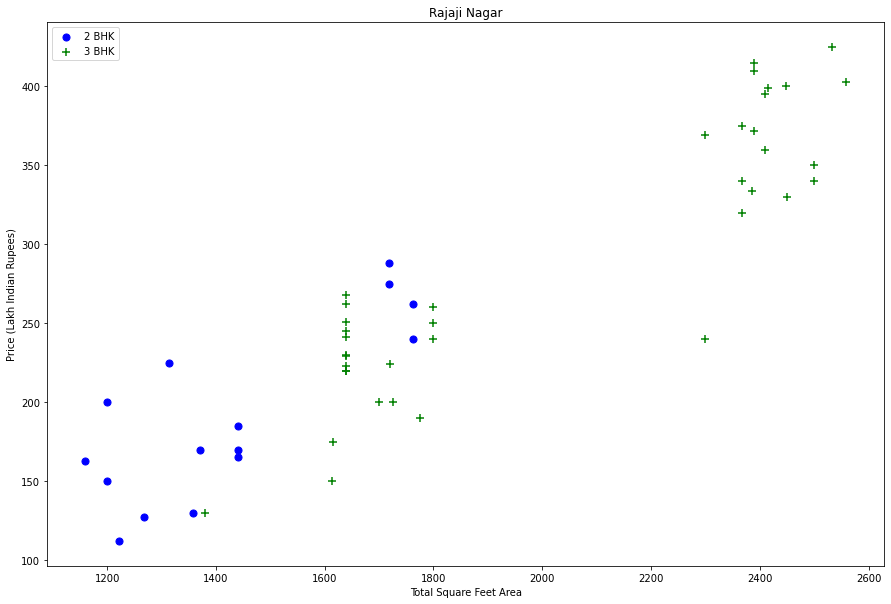

In [36]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df9,"Rajaji Nagar")

#### There are some 2 bhk flats whose prices are higher than the 3 bhk flats for the same location this seems to be incorrect. Therefore we  will try to remove those data points.

In [37]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df10 = remove_bhk_outliers(df9)

df10.shape

(7062, 9)

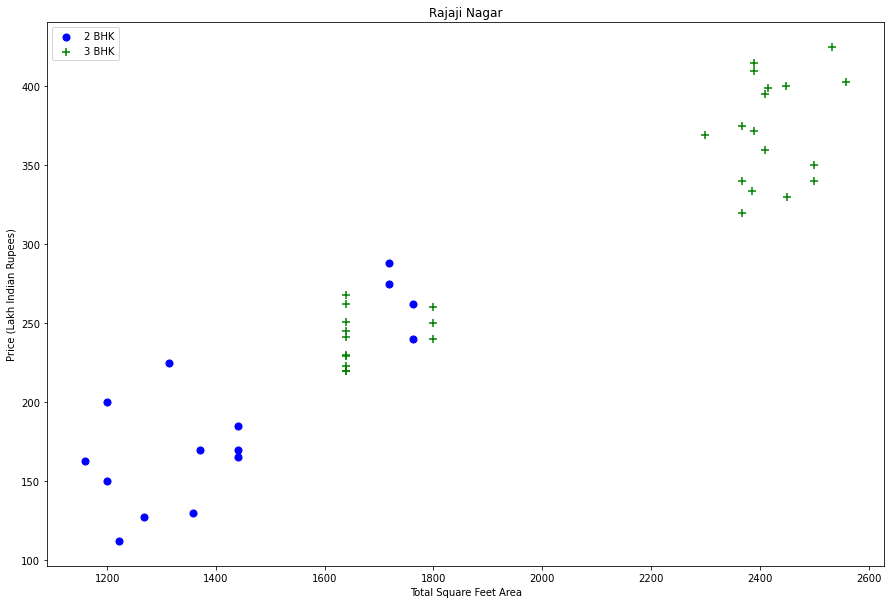

In [38]:
plot_scatter_chart(df10,"Rajaji Nagar")

In [39]:
df10.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bhk
0,Super built-up Area,1st Block Jayanagar,2850,4.0,1.0,428.0,4.0,15017.543860,712.500000
1,Super built-up Area,1st Block Jayanagar,1630,3.0,2.0,194.0,3.0,11901.840491,543.333333
2,Super built-up Area,1st Block Jayanagar,1875,2.0,3.0,235.0,3.0,12533.333333,625.000000
3,Built-up Area,1st Block Jayanagar,1200,2.0,0.0,130.0,3.0,10833.333333,400.000000
4,Super built-up Area,1st Block Jayanagar,1235,2.0,2.0,148.0,2.0,11983.805668,617.500000


In [40]:
df11 = df10[df10.bath<df10.bhk+2]
df11.shape

(6997, 9)

In [41]:
df12 = df11.drop(['sqft_per_bhk','price_per_sqft'],axis='columns')
df12.head(3)

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850,4.0,1.0,428.0,4.0
1,Super built-up Area,1st Block Jayanagar,1630,3.0,2.0,194.0,3.0
2,Super built-up Area,1st Block Jayanagar,1875,2.0,3.0,235.0,3.0


In [42]:
df12.corr()['price']

total_sqft    0.821884
bath          0.657257
balcony       0.225480
price         1.000000
bhk           0.632179
Name: price, dtype: float64

#### Total_sqft have high correlation with the price, it is what we wanted in our data

In [43]:
mean_by_area = df12.groupby('area_type')['price'].mean()
mean_by_area

area_type
Built-up  Area           93.306738
Carpet  Area             87.250000
Plot  Area              133.988781
Super built-up  Area     86.602306
Name: price, dtype: float64

In [44]:
mean_by_location = df12.groupby('location')['price'].mean()
mean_by_location

location
1st Block Jayanagar          273.714286
1st Phase JP Nagar           124.029412
2nd Phase Judicial Layout     47.875000
2nd Stage Nagarbhavi         218.750000
5th Block Hbr Layout         112.166667
                                ...    
Yelahanka                     84.591471
Yelahanka New Town            50.750000
Yelenahalli                   49.377500
Yeshwanthpur                  89.324189
other                        125.673888
Name: price, Length: 242, dtype: float64

#### Now it's time to give Rank to area_types and location based on their influence on price

In [45]:
df13 = df12.groupby(['area_type','location'])['price'].mean()
df13

area_type             location            
Built-up  Area        1st Block Jayanagar     130.000000
                      1st Phase JP Nagar       70.750000
                      5th Block Hbr Layout    215.000000
                      5th Phase JP Nagar       64.877778
                      6th Phase JP Nagar       75.000000
                                                 ...    
Super built-up  Area  Yelahanka                77.541269
                      Yelahanka New Town       54.138889
                      Yelenahalli              50.446667
                      Yeshwanthpur             82.424091
                      other                   124.239417
Name: price, Length: 566, dtype: float64

In [46]:
data = pd.DataFrame(df13)
data.sort_values(by=['price'],ascending=False, inplace=True)
data.head()

price
area_type            location                   
Super built-up  Area Cunningham Road  520.666667
Plot  Area           Indira Nagar     438.333333
                     Giri Nagar       407.000000
                     BTM 2nd Stage    388.000000
                     HAL 2nd Stage    381.666667

In [47]:
data.shape

(566, 1)

<AxesSubplot:xlabel='area_type,location'>

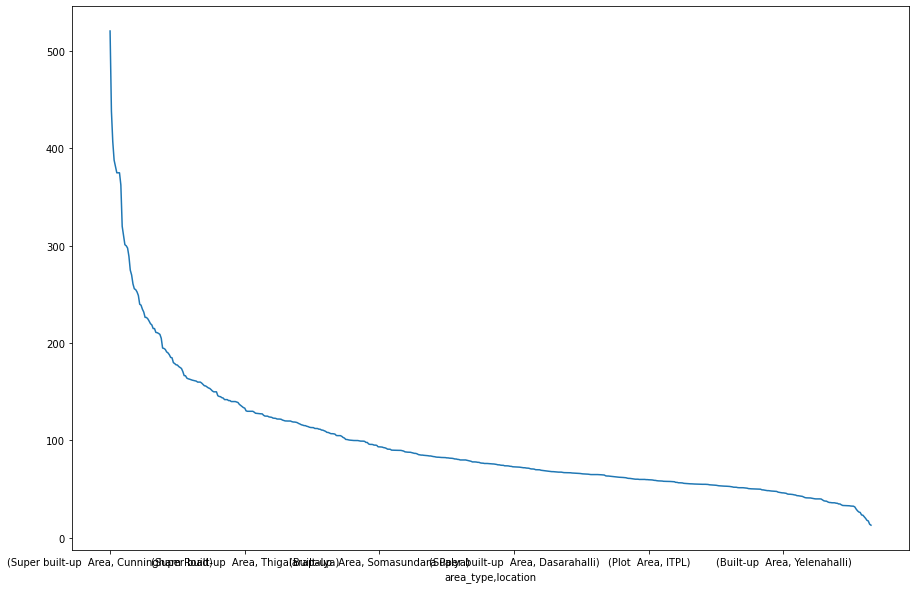

In [48]:
data.price.plot()

In [49]:
data.reset_index(inplace=True)
data.head()

,area_type,location,price
0,Super built-up Area,Cunningham Road,520.666667
1,Plot Area,Indira Nagar,438.333333
2,Plot Area,Giri Nagar,407.000000
3,Plot Area,BTM 2nd Stage,388.000000
4,Plot Area,HAL 2nd Stage,381.666667


In [50]:
data['rank']= data['price'].index.values +1
data.head()

,area_type,location,price,rank
0,Super built-up Area,Cunningham Road,520.666667,1
1,Plot Area,Indira Nagar,438.333333,2
2,Plot Area,Giri Nagar,407.000000,3
3,Plot Area,BTM 2nd Stage,388.000000,4
4,Plot Area,HAL 2nd Stage,381.666667,5


In [51]:
df14 = pd.merge(df12,data.drop('price',axis =1),left_on=['area_type','location'],right_on=['area_type','location'])
df14.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,rank
0,Super built-up Area,1st Block Jayanagar,2850,4.0,1.0,428.0,4.0,14
1,Super built-up Area,1st Block Jayanagar,1630,3.0,2.0,194.0,3.0,14
2,Super built-up Area,1st Block Jayanagar,1875,2.0,3.0,235.0,3.0,14
3,Super built-up Area,1st Block Jayanagar,1235,2.0,2.0,148.0,2.0,14
4,Super built-up Area,1st Block Jayanagar,2750,4.0,0.0,413.0,4.0,14


In [52]:
df14.corr()['price']

total_sqft    0.821884
bath          0.657257
balcony       0.225480
price         1.000000
bhk           0.632179
rank         -0.588344
Name: price, dtype: float64

We can clearly see that Rank as a better correlation with 'price' feature

In [53]:
df15 = df14.drop(['area_type', 'location'], axis =1 ).copy()
df15.head()

,total_sqft,bath,balcony,price,bhk,rank
0,2850,4.0,1.0,428.0,4.0,14
1,1630,3.0,2.0,194.0,3.0,14
2,1875,2.0,3.0,235.0,3.0,14
3,1235,2.0,2.0,148.0,2.0,14
4,2750,4.0,0.0,413.0,4.0,14


In [54]:
df15.isnull().sum()

total_sqft      0
bath            0
balcony       185
price           0
bhk             0
rank            0
dtype: int64

In [55]:
df15.corr()['balcony']

total_sqft    0.316139
bath          0.284025
balcony       1.000000
price         0.225480
bhk           0.263251
rank         -0.095563
Name: balcony, dtype: float64

There are still missing values in 'balcony' column, we will try to use classfier to fill in the missing values

In [56]:
missing_balcony_df = df15.isnull()
missing_indexes = missing_balcony_df[missing_balcony_df['balcony']== True].index.values

In [57]:
balcony_missing  = df15.loc[missing_indexes]
balcony_missing

,total_sqft,bath,balcony,price,bhk,rank
15,1200,2.0,NaN,86.0,2.0,97
19,1500,5.0,NaN,85.0,5.0,314
45,2500,5.0,NaN,110.0,5.0,343
68,3245,4.0,NaN,250.0,4.0,116
69,2040,3.0,NaN,200.0,3.0,116
...,...,...,...,...,...,...
6851,2300,4.0,NaN,200.0,4.0,115
6888,1313,4.0,NaN,150.0,3.0,115
6975,1650,6.0,NaN,200.0,5.0,115
6987,4500,9.0,NaN,500.0,9.0,81


In [58]:
bal_x = balcony_missing.drop('balcony',axis = 1)
bal_x 

,total_sqft,bath,price,bhk,rank
15,1200,2.0,86.0,2.0,97
19,1500,5.0,85.0,5.0,314
45,2500,5.0,110.0,5.0,343
68,3245,4.0,250.0,4.0,116
69,2040,3.0,200.0,3.0,116
...,...,...,...,...,...
6851,2300,4.0,200.0,4.0,115
6888,1313,4.0,150.0,3.0,115
6975,1650,6.0,200.0,5.0,115
6987,4500,9.0,500.0,9.0,81


In [59]:
non_missing_index = [x for x  in df15.index if x not in missing_indexes]
balcony_non_missing  = df15.loc[non_missing_index]
balcony_non_missing

,total_sqft,bath,balcony,price,bhk,rank
0,2850,4.0,1.0,428.0,4.0,14
1,1630,3.0,2.0,194.0,3.0,14
2,1875,2.0,3.0,235.0,3.0,14
3,1235,2.0,2.0,148.0,2.0,14
4,2750,4.0,0.0,413.0,4.0,14
...,...,...,...,...,...,...
6991,1489,2.0,0.0,101.0,2.0,81
6992,2050,3.0,2.0,135.0,3.0,81
6993,2100,3.0,0.0,210.0,4.0,81
6994,1625,3.0,1.0,150.0,3.0,81


In [60]:
def normalize(df):
    result = df.copy()
    for feature_name in ['total_sqft','price','bath','bhk']:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [61]:
balcony_non_missing_normal = normalize(balcony_non_missing)
balcony_non_missing_normal

,total_sqft,bath,balcony,price,bhk,rank
0,0.447368,0.250000,1.0,0.564865,0.250000,14
1,0.233333,0.166667,2.0,0.248649,0.166667,14
2,0.276316,0.083333,3.0,0.304054,0.166667,14
3,0.164035,0.083333,2.0,0.186486,0.083333,14
4,0.429825,0.250000,0.0,0.544595,0.250000,14
...,...,...,...,...,...,...
6991,0.208596,0.083333,0.0,0.122973,0.083333,81
6992,0.307018,0.166667,2.0,0.168919,0.166667,81
6993,0.315789,0.166667,0.0,0.270270,0.250000,81
6994,0.232456,0.166667,1.0,0.189189,0.166667,81


In [62]:
x_train_bal = balcony_non_missing_normal.drop(['balcony','rank'], axis =1)
y_train_bal = balcony_non_missing_normal['balcony']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train_bal,y_train_bal,test_size=0.2,random_state=42)

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier()
#from sklearn.ensemble import GradientBoostingClassifier
#model = GradientBoostingClassifier()
#from sklearn.naive_bayes import GaussianNB
#model = GaussianNB()
#from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier(n_neighbors=5)
#from sklearn.svm import SVC
#model = SVC()

In [65]:
model.fit(X_train,y_train)

LogisticRegression()

In [66]:
model.score(X_test,y_test)

0.5458547322083639

In [67]:
model.score(X_train,y_train)

0.5052303174894476

In [68]:
model.fit(x_train_bal,y_train_bal)

LogisticRegression()

In [69]:
model.score(x_train_bal,y_train_bal)

0.5137991779213154

In [70]:
bal_x_normal = normalize(bal_x)


y_pred = model.predict(bal_x_normal.drop('rank', axis =1))
y_pred




array([1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2.,
       1., 1., 1., 2., 3., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 2., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1.])

In [71]:
balcony_missing['balcony'] = y_pred
balcony_missing

,total_sqft,bath,balcony,price,bhk,rank
15,1200,2.0,1.0,86.0,2.0,97
19,1500,5.0,1.0,85.0,5.0,314
45,2500,5.0,2.0,110.0,5.0,343
68,3245,4.0,1.0,250.0,4.0,116
69,2040,3.0,1.0,200.0,3.0,116
...,...,...,...,...,...,...
6851,2300,4.0,1.0,200.0,4.0,115
6888,1313,4.0,1.0,150.0,3.0,115
6975,1650,6.0,1.0,200.0,5.0,115
6987,4500,9.0,3.0,500.0,9.0,81


In [72]:
df16 = pd.concat([balcony_missing,balcony_non_missing], axis = 0)
df16.head()

,total_sqft,bath,balcony,price,bhk,rank
15,1200,2.0,1.0,86.0,2.0,97
19,1500,5.0,1.0,85.0,5.0,314
45,2500,5.0,2.0,110.0,5.0,343
68,3245,4.0,1.0,250.0,4.0,116
69,2040,3.0,1.0,200.0,3.0,116


In [73]:
df16.isnull().sum()

total_sqft    0
bath          0
balcony       0
price         0
bhk           0
rank          0
dtype: int64

In [74]:
df16.dtypes

total_sqft      int32
bath          float64
balcony       float64
price         float64
bhk           float64
rank            int64
dtype: object

In [75]:
df16.corr()['price']

total_sqft    0.821884
bath          0.657257
balcony       0.200008
price         1.000000
bhk           0.632179
rank         -0.588344
Name: price, dtype: float64

In [76]:
x= df16.drop(['price','balcony'], axis = 1)
y = df16['price']

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [78]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7500697440689653

In [79]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.75488534, 0.75675717, 0.76999089, 0.73685719, 0.74682835])

In [82]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'Random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators' :[200,250,300],
                'max_features' : ['auto', 'sqrt'],
                'min_samples_split' : [2, 5, 10],
                'bootstrap' : [True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

df = find_best_model_using_gridsearchcv(x,y)

In [86]:
df

,model,best_score,best_params
0,linear_regression,0.757266,{'normalize': True}
1,lasso,0.757668,"{'alpha': 1, 'selection': 'random'}"
2,Random_forest,0.883142,"{'bootstrap': True, 'max_features': 'sqrt', 'm..."
3,decision_tree,0.797104,"{'criterion': 'mse', 'splitter': 'best'}"


In [87]:

model = RandomForestRegressor(bootstrap= True, max_features='sqrt',min_samples_split=10, n_estimators = 200)
model.fit(x,y)

RandomForestRegressor(max_features='sqrt', min_samples_split=10,
                      n_estimators=200)

In [88]:
import pickle
with open('banglore_home_prices_model_2.pickle','wb') as f:
    pickle.dump(model,f)

In [92]:
import json
columns = {
    'data_columns2' : [col.lower() for col in x.columns]
}
with open("columns2.json","w") as f:
    f.write(json.dumps(columns))